<h1><b><Center>Question 1: Customer Segmentation using K-Means
Clustering<br><hr>

In [38]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [36]:
data = pd.read_csv('mallcustomer.csv')
x = data.copy() 
x["Gender"]=x["Gender"].map({"Male": 1,"Female": 0})
x=x.drop("CustomerID",axis=1)

In [30]:
scaler = MinMaxScaler()
x[["Age","Annual Income (k$)","Spending Score (1-100)"]]=scaler.fit_transform(x[["Age","Annual Income (k$)","Spending Score (1-100)"]])

In [37]:

kmean = KMeans(3)
kmean.fit(x)
clustors = kmean.fit_predict(x)
data["Clustor"]=clustors
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clustor
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,1
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


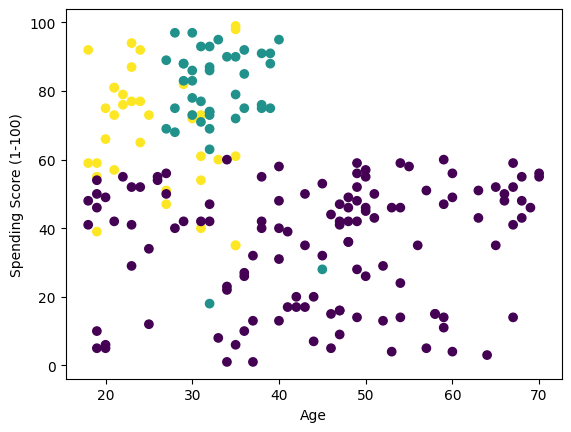

In [39]:
plt.scatter(data["Age"],data["Spending Score (1-100)"],c=data["Clustor"])
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

<H1><B><CENTER>Question 2: Determining the Optimal Number of Clus-
ters

In [51]:
sse = []
for k in range(1,100):
    kmean = KMeans(n_clusters=k,max_iter=300,random_state=0)
    kmean.fit(x)
    kmean.fit_predict(x)
    sse.append(kmean.inertia_)
sse

[308862.06,
 212889.44245524297,
 143391.59236035674,
 105299.98742210324,
 82657.05476706792,
 58387.211042939205,
 52544.81463287702,
 44389.807673557676,
 40670.989962363215,
 37201.52704476877,
 35360.07987012988,
 33108.3862914863,
 31667.7612914863,
 30472.522961760467,
 28807.9444023569,
 26983.968573896862,
 25832.92024056353,
 24617.65642798722,
 22358.63555668016,
 20478.456298438403,
 19964.092179144387,
 18327.47253628724,
 17711.77253628724,
 17399.058250572958,
 16618.55067481538,
 15975.538770053474,
 14899.305436720142,
 14255.63255404726,
 13544.13255404726,
 12901.563048063048,
 12452.872571872573,
 12149.840753690753,
 11582.960198135197,
 11237.960198135197,
 11085.651864801865,
 10900.651864801865,
 10589.985198135199,
 10194.7851981352,
 9874.167676767678,
 9488.323232323233,
 9157.896572871574,
 8945.729906204906,
 8743.837445887446,
 8437.456493506495,
 8251.813636363637,
 8159.813636363637,
 7914.1303030303025,
 7450.852525252525,
 7323.130303030304,
 7162.3969

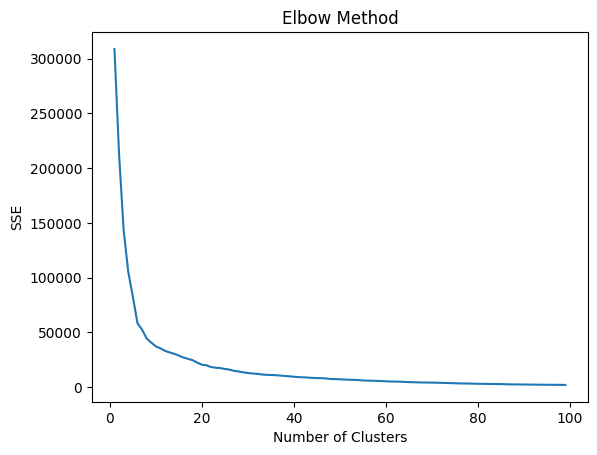

In [52]:
number_clusters = range(1, 100)
plt.plot(number_clusters, sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [54]:
kmean = KMeans(40)
kmean.fit(x)
predict = kmean.fit_predict(x)
new_data = data.copy()
new_data["Clustor"]=predict
new_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clustor
0,1,Male,19,15,39,8
1,2,Male,21,15,81,37
2,3,Female,20,16,6,13
3,4,Female,23,16,77,37
4,5,Female,31,17,40,35
...,...,...,...,...,...,...
195,196,Female,35,120,79,6
196,197,Female,45,126,28,5
197,198,Male,32,126,74,6
198,199,Male,32,137,18,5


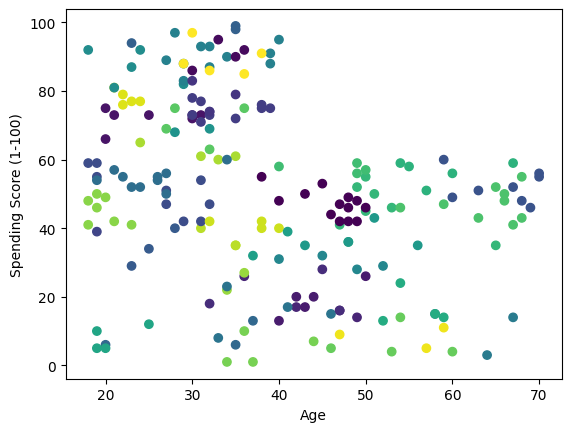

In [57]:
plt.scatter(new_data["Age"],new_data["Spending Score (1-100)"],c=new_data["Clustor"])
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

<hr><br><h1><Center>THE END